# Data Curation - NLP Tools and Sources

### Introduction
This Jupyter Notebook focuses on scraping textual data from online news sources and store the data in structured formats like .csv files using Python libraries. It also explores data augmentation using Synonym replacement.

### Key Stages of the Notebook
<b>1. Library Setup and Installation</b><br>
Essential libraries for web scraping are installed:
- requests and beautifulsoup4 for extracting data from web pages.
- pandas for data organization and manipulation.
- NLPAug is a python library for textual augmentation.

<b>2. Web Scraping of News Headlines</b><br>
Using requests and BeautifulSoup, the notebook fetches headlines from two prominent sources: BBC and CNN. The scraped headlines are structured into a dataset for further analysis.

<b> 3. Data Storage and Export</b><br>
The scrapped data is saved into CSV file by the name 'news_headlines_multiple_sources.csv'

<b>4. Data Augmentation</b></br>
Data augmentation is performed using a synonym augmenter to enhance the diversity of the dataset.


### Learning Outcome
Upon completion of this Notebook, students will be able to
- Install and import Python libraries
- Use Python Libraries and curate data
- Combine data curated from multiple sources
- Store the data in a structured format
- Augment the data collected in increase the diversity of the data

### What kind of AI Projects would this Jupyter Notebook extend to?
This code provides a foundation for the following types of AI projects:
- <b>Text Classification:</b> Classify headlines into categories like politics, sports, technology, etc.
- <b>Sentiment Analysis:</b> Determine the sentiment (positive, negative, neutral) of the news headlines.
- <b>Named Entity Recognition (NER):</b> Identify named entities like persons, locations, and organizations in the headlines.
- <b>Topic Modeling:</b> Uncover hidden topics in the dataset using techniques like Latent Dirichlet Allocation (LDA).
- <b>News Summarization:</b> Generate summaries of headlines or related articles.
- <b>Trend Analysis:</b> Analyze the frequency and evolution of specific topics or keywords in news headlines.
- <b>Fake News Detection:</b> Use the dataset as part of a larger collection to train models for distinguishing between fake and authentic news.

### What kind of AI models can use this dataset?
The processed dataset can be used for training and evaluating various AI models:<br>

<b>Natural Language Processing (NLP) models:</b>
- Text Classification models (e.g., XLNet).
- Sentiment Analysis models (e.g.,BERT, GPT).
- Named Entity Recognition (NER) models (e.g., BERT, RoBERTa).<br>

<b>Sequence Models:</b>
- Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) networks for sequential data processing.<br>

<b>Transformer-Based Models:</b>
- Pre-trained models like GPT or T5 for headline generation or summarization.

### Content Flow
An outline of the steps involved in this Python implementation
1. [Import the required libraries](#import-the-required-libraries)
2. [Web Scrapping for Data Collection](#Web-Scrapping)
3. [Save the Scrapped data as .csv file](#save-the-scrapped-data-as-csv-file)
4. [Data Augmentation](#data-augmentation)

### Time Required
It would take about an hour or two to complete the process discussed in this notebook. Follow the instructions and go through the additional explanations in this Notebook for easier execution.

### Hardware Requirement:
Any computer with access to internet and web browser.

# Import the required Libraries

For the task of data curation, different libraries serve distinct but complementary roles in collecting, cleaning, processing, and analyzing textual data. In this implementation, we will be using the following libraries.<br>

<b>Requests</b>: Used to retrieve HTML content from web pages or structured data. <br>

<b>Beautifulsoup</b>: Processes the raw HTML content fetched by requests and extracts relevant text or elements (e.g., headlines, article bodies) based on tags, classes, or IDs.<br>

<b>Pandas</b>: Stores the extracted data (e.g., headlines, source URLs) in a structured format like DataFrames for easier manipulation and analysis. <br>

<b>NLPAug</b>: NLPAug is a python library for textual augmentation. It enhances the quality and diversity of NLP datasets.

In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import nlpaug.augmenter.word as naw

# Web Scrapping

Let's begin by collecting data from online sources like BBC and CNN.

We define a function *scrape_headlines()* that collects headlines from a web page by:
- Fetching the HTML content using the URL provided
- Search for specific HTML tags (e.g., \<h2>, \<span>) and attributes (e.g., class names) identifying where the headlines are located.
- Retrieve the text content of these elements and return it as a list.

In [18]:
def scrape_headlines(url, tag, attributes=None):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an HTTPError for bad responses
        soup = BeautifulSoup(response.text, 'html.parser')
        return [headline.text.strip() for headline in soup.find_all(tag, attrs=attributes)]
    except requests.exceptions.RequestException as e:
        print(f"Error fetching the URL: {e}")
        return []
    except Exception as e:
        print(f"An error occurred: {e}")
        return []

Let's call the function to retrieve data from BBC and CNN official websites.

In [19]:
# BBC
bbc_headlines = scrape_headlines("https://www.bbc.com", "h2")

# CNN
cnn_headlines = scrape_headlines("https://www.cnn.com", "span", {"class": "container__headline-text"})

print(cnn_headlines)

['Investigating trafficking networks', 'Met Gala faces criticism', 'Jesse Jackson out of hospital', 'New X feature', 'Domesticated urban raccoons', 'Wellness tips for Thanksgiving', 'Judge throws out cases against James Comey and Letitia James', 'Takeaways from Lindsey Halligan’s disqualification and dismissal of the James Comey and Letitia James cases', 'Former White House Lawyer on Trump’s vow to appeal Comey & James case dismissal over ‘technical’ ruling', 'This volcano erupted for the first time in 10,000 years sending ash clouds across continents', 'The meeting in Abu Dhabi comes after days of intense diplomacy in Geneva over a 28-point proposal to end the war', 'The talks with Russia are meant to lay the groundwork for higher-level engagements in the future', 'Facing a lack of Russian recruits, Moscow is accused of using deception and bribery to sign up foreigners to fight in Ukraine', 'New wave of Russian strikes on Kyiv', 'Catch up on today’s global news', 'The Met Gala is faci

*NOTE:*
- Observe that the input to the functions vary for the attributes passed. Learners can identify this by navigating to the specific URL
- Select the text in the headline
- Right click on the webpage, and select Inspect
- Click on Ctrl + F, paste the headline and press Enter.
- Identify the HTML tag within which the headlines have been define.
- In case of BBC website, the headlines are defined in \<h2> tag.
- Similarly, in the CNN website all the headlines are defined within the \<span> tag and an additional attribute "class".

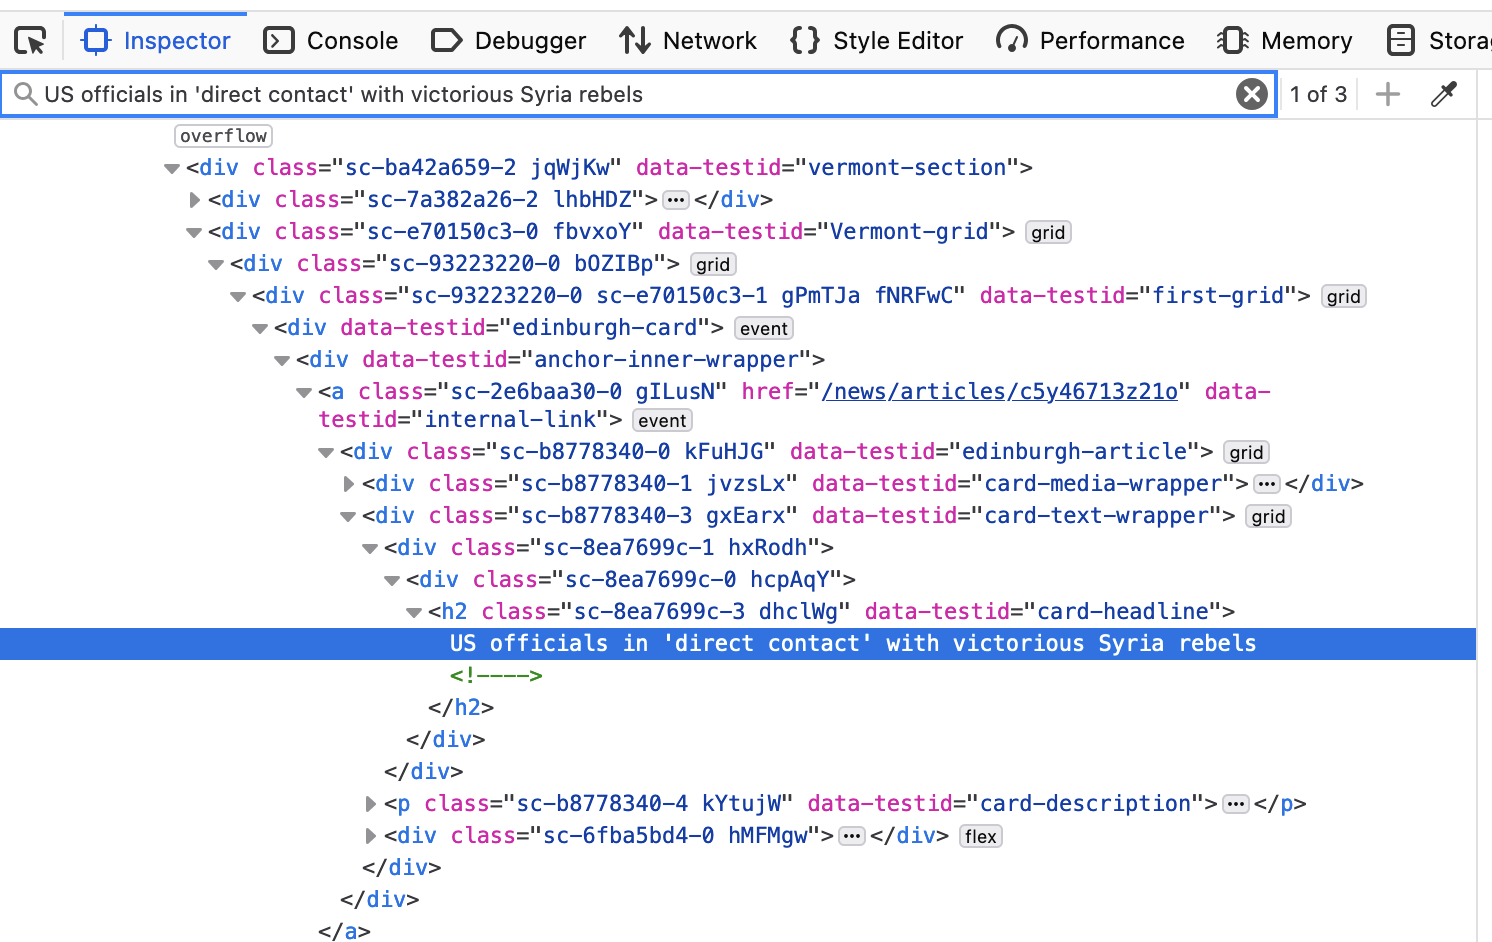

Next, an empty list, all_headlines, serves as a container to store the collected headlines along with their respective sources.

In [25]:
# Master dictionary to store data
all_headlines = []

The following code Loops through the list bbc_headlines (containing headlines from the BBC).
For each headline, creates a dictionary with:

    "Source": The source of the headline ("BBC").
    "Headline": The headline text.

Appends each dictionary to all_headlines.
Similar process is repeated for the headlines collected from CNN website and added to the same dictionary.

In [21]:
all_headlines.extend([{"Source": "BBC", "Headline": headline} for headline in bbc_headlines])
all_headlines.extend([{"Source": "CNN", "Headline": headline} for headline in cnn_headlines])

The following code block is designed to display all the collected headlines stored in the *all_headlines* list in a clear and organized manner. It ensures that only valid entries (those stored as dictionaries) are displayed correctly, and it flags any invalid entries.

In [22]:
# Print all collected headlines
print("All Headlines:")
for i, entry in enumerate(all_headlines, start=1):
    if isinstance(entry, dict):  # Ensure each entry is a dictionary
        print(f"{i}. Source: {entry['Source']}, Headline: {entry['Headline']}")
    else:
        print(f"{i}. Invalid entry detected: {entry}")

All Headlines:
1. Source: BBC, Headline: Updated peace plan could be a deal Ukraine will take - eventually
2. Source: BBC, Headline: Family reunited after a decade – now a Trump clampdown could tear them apart
3. Source: BBC, Headline: Updated peace plan could be a deal Ukraine will take - eventually
4. Source: BBC, Headline: Family reunited after a decade – now a Trump clampdown could tear them apart
5. Source: BBC, Headline: US and Russian officials to meet in Abu Dhabi for Ukraine peace talks after deadly overnight strikes
6. Source: BBC, Headline: BBC may not be in 'safe hands' under its chair, says committee head
7. Source: BBC, Headline: Controversial US-backed Gaza Humanitarian Foundation ends aid operations
8. Source: BBC, Headline: Music eases surgery and speeds recovery, Indian study finds
9. Source: BBC, Headline: How X's new location feature exposed big US politics accounts
10. Source: BBC, Headline: Only from the BBC
11. Source: BBC, Headline: The music that keeps animals 

Next, using the Pandas library we store the collected headlines in a structured tabular format (a DataFrame) and save this data as a CSV file for long-term storage or further processing.

# Save the scrapped data as .csv file

In [23]:
# Convert the list to a DataFrame
data = pd.DataFrame(all_headlines, columns=["Source", "Headline"])

In [24]:
# Save to CSV
output_file = "news_headlines_multiple_sourcesV1.csv"
data.to_csv(output_file, index=False)
print(f"Scraped data saved to {output_file}")

Scraped data saved to news_headlines_multiple_sourcesV1.csv


In [25]:
#Display the content of the .csv file
data

,Source,Headline
0,BBC,Updated peace plan could be a deal Ukraine wil...
1,BBC,Family reunited after a decade – now a Trump c...
2,BBC,Updated peace plan could be a deal Ukraine wil...
3,BBC,Family reunited after a decade – now a Trump c...
4,BBC,US and Russian officials to meet in Abu Dhabi ...
...,...,...
193,CNN,Reggae legend Jimmy Cliff dies at 81
194,CNN,"‘Oh my God, this is our Tanzania’: CNN investi..."
195,CNN,"She married her brother, then he died. The mon..."
196,CNN,JFK’s granddaughter reveals terminal cancer di...


Observe, there is repetition in the data curation. (Index 0 and 2, 1 and 3). Handling these duplicates will be discussed in detail in the following week.

# Data Augmentation

The purpose of data augmentation in text data is to enhance the diversity and size of a dataset by generating synthetic variations of the existing text. This process improves model performance, generalization, and robustness, particularly when dealing with limited or imbalanced datasets.

The following segment performs data augmentation using Synonym Replacement technique. i.e., words in a sentence are replaced with words with similar meanings.

Let's begin by initializing the Synonym Augmenter from nlpaug library. 'naw' stands for 'Natural Language Word-level'.<br>
aug_p is a parameter that specifies the percentage of words in a text to be replaced by synonyms.

In [29]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tamra\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tamra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tamra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [3]:
import nlpaug.augmenter.word as naw

# Initialize the Synonym Augmenter
aug = naw.SynonymAug(aug_p=0.25)  # aug_p defines the probability of synonym replacement

Here, 25% of the words in the text will be replaced by synonyms.

In [10]:
import pandas as pd
# Load CSV file with text data
input_file = './news_headlines_multiple_sourcesV1.csv'  # Update with your file path
df = pd.read_csv(input_file)

In [11]:
# Initialize an empty list to hold the augmented rows
augmented_data = []

The code below, iterates through each row of the DataFrame, extracts the original text from the 'Headline' column Then, applies synonym augmentation to the text.

Finally, appends the original text and its augmented version to the augmented_data list.

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\tamra\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [14]:
# Iterate through each row to augment the 'Headline' column
for index, row in df.iterrows():
    original_source = row['Source']  # Extract the 'Source' column
    original_text = row['Headline']  # Extract the 'Headline' column
    
    # Generate augmented headline
    augmented_text = aug.augment(original_text)
    
    # Append original and augmented rows
    augmented_data.append([original_source, original_text])  # Original row
    augmented_data.append([original_source, augmented_text[0]])  # Augmented row

The following line of code converts the augmented data into a DataFrame.

In [17]:
# Convert augmented data into a DataFrame
augmented_df = pd.DataFrame(augmented_data, columns=['Source', 'Headline'])

In [18]:
# Save the augmented data to a new CSV file
output_file = 'augmented_news_data.csv'
augmented_df.to_csv(output_file, index=False)

In [24]:
# Display the first few rows of the augmented data
print(f"Augmented dataset saved to {output_file}")
print(augmented_df.head())

Augmented dataset saved to augmented_news_data.csv
  Source                                           Headline
0    BBC  Updated peace plan could be a deal Ukraine wil...
1    BBC  Update peace plan could cost a trade Ukraine w...
2    BBC  Family reunited after a decade – now a Trump c...
3    BBC  Family reunify after a decade – now a Cornet c...
4    BBC  Updated peace plan could be a deal Ukraine wil...


In [ ]:
data_final = pd.read_csv('augmented_news_data.csv')
len(data_final) #To find the size of the augmented dataset

392

### Observations
* The code uses requests and BeautifulSoup to scrape news headlines from BBC and CNN websites.
* The function scrape_headlines is used to fetch the headlines from a specific URL, extract the text using HTML tags, and handle any potential errors during the scraping process.
* The scraped headlines from BBC and CNN are collected and stored in a list of dictionaries.
* Each dictionary has the source ("BBC" or "CNN") and the corresponding headline.
* This list is then converted into a Pandas DataFrame for easier manipulation and further analysis.
* The saved csv file is loaded into the Python environment
* Using Synonym Augmenter from the NLPAug library the text from the csv is augmented.
* "aug_p" is the parameter that controls the percentage of text that can replaced from the original text.
* The original scrapped dataset has 230 rows of data, post augmentation, the dataset has 430 rows of data.